# Import Modules

In [456]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Data

In [457]:
raw_data= pd.read_csv('titanic.csv')

In [458]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [459]:
raw_data.info()
100*raw_data.isnull().sum()/raw_data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

We are missing 77.5% of our cabin data, therefore it is probably best to drop that column. We will, however, check to see if there is anything useful. We will need to impute the missing Ages and Fare columns. We will also need to convert to integer (possibly one hot encode) or drop on the columns which are an object type (Name, Sex, and Ticket, Cabin, Embarked)

We can drop the Name column, but it would be nice to keep the title as it might help us estimate the missing ages

We will want our target as the last column, and it would be nice to have a list of all the inputs

In [460]:
col_order = ['Pclass', 'Name','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Survived']
raw_data = raw_data[col_order]

# Split the Data

Split the data before processing to prevent data leakage

In [461]:
inputs = raw_data.iloc[:,:-1]

In [462]:
target = raw_data['Survived']

In [463]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2, random_state= 42)

# Explore the Data

In [464]:
data = pd.concat([x_train,y_train],axis=1)
data = data.reset_index(drop=True)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,10.5000,E77,S,0
1,2,"Beane, Mr. Edward",male,32.0,1,0,26.0000,NaN,S,1
2,3,"Connolly, Miss. Kate",female,22.0,0,0,7.7500,NaN,Q,1
3,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,1
4,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,34.3750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
1042,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,10.5000,NaN,S,0
1043,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,106.4250,C86,C,1
1044,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,47.1000,NaN,S,0
1045,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,NaN,S,0


### Effect of Class, Sex, and Port of Origin

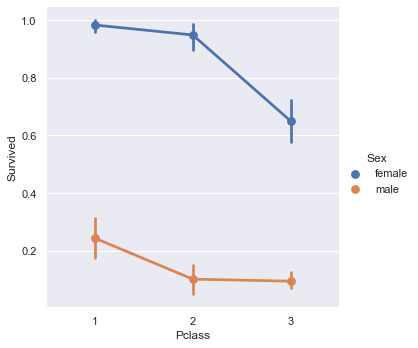

In [465]:
sns.catplot(x='Pclass', y="Survived", hue="Sex",data=data,kind="point")

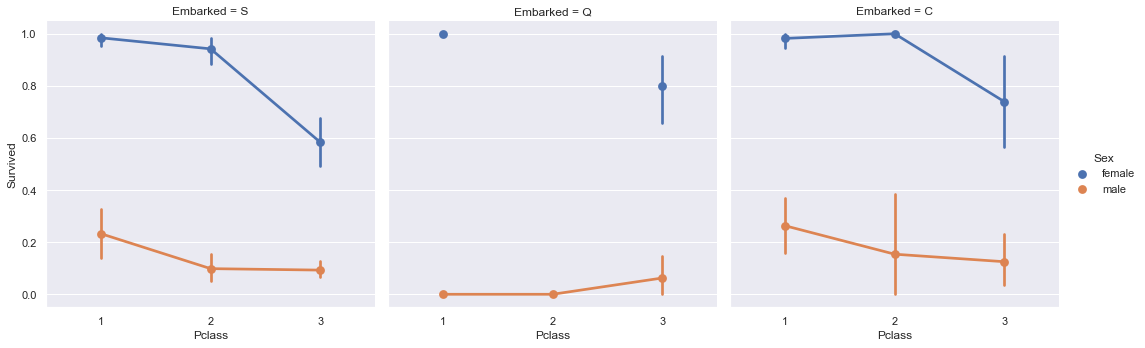

In [466]:
sns.catplot(x='Pclass', y="Survived", col="Embarked", hue='Sex',data=data,kind="point")

There is a noticable effect on survival based on class and sex. Embarked may have a small effect based on class with worse odds for first class men at Queenstown and better odds for 3rd class men at Queenstown

### Cabin

In [467]:
len(raw_data['Cabin'].unique())

187

In [468]:
cabin_test= raw_data.copy()
cabin_test['Cabin'] = cabin_test['Cabin'].fillna('U100')
cabin_test['Deck'] = [cabin[0] for cabin in cabin_test['Cabin']]
cabin_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Deck
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U100,S,0,U
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U100,S,1,U
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,C
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U100,S,0,U


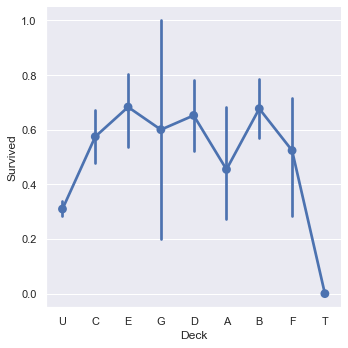

In [469]:
sns.catplot(x='Deck', y="Survived",data=cabin_test,kind="point")

The confidence intervals are pretty wide. This is probably due to the large amount of missing data. We'll go ahead and drop the feature

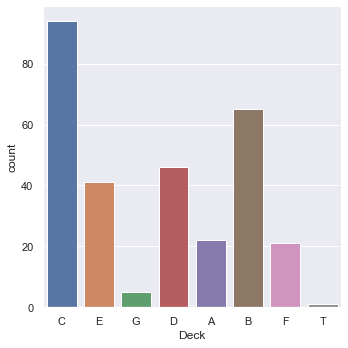

In [470]:
sns.catplot(x='Deck',data=cabin_test[cabin_test['Deck'] != 'U'],kind="count")

### Age

Text(0.5, 1.0, 'Male')

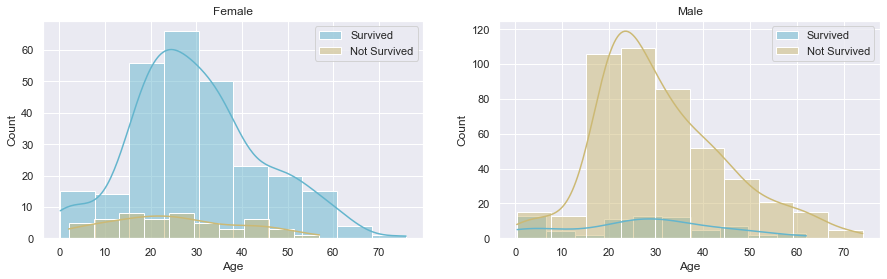

In [471]:
men = data[data['Sex']=='male']
women = data[data['Sex']=='female']
survive =['c',"Survived"]
nsurvive =['y',"Not Survived"]
bins =10

fig, axes = plt.subplots(1, 2,figsize = (15,4))
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), ax = axes[0],bins=bins, kde =True, 
                  color = survive[0], label = survive[1])
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), ax = axes[0], bins=bins,kde =True,
                  color = nsurvive[0], label = nsurvive[1])
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(),ax = axes[1], bins=bins,kde =True,
                  color = survive[0], label = survive[1])
ax = sns.histplot(men[men['Survived']==0].Age.dropna(),ax = axes[1], bins=bins,kde =True,
                  color = nsurvive[0], label = nsurvive[1])
ax.legend()
ax.set_title('Male')

Interestingly is that the ages you are most likely to survive are also the areas you are most likely to not survive. The peaks though are offset; men peak 20-30 and women 20-40

### Family

The grouping for the family categories SibSp and Parch seem odd. 

In [472]:
data['Family'] = data['SibSp']+data['Parch']
data = data.drop(columns = ['SibSp','Parch'])
data

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Survived,Family
0,2,"Mack, Mrs. (Mary)",female,57.0,10.5000,E77,S,0,0
1,2,"Beane, Mr. Edward",male,32.0,26.0000,NaN,S,1,1
2,3,"Connolly, Miss. Kate",female,22.0,7.7500,NaN,Q,1,0
3,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,G6,S,1,2
4,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,34.3750,NaN,S,0,4
...,...,...,...,...,...,...,...,...,...
1042,2,"Andrew, Mr. Frank Thomas",male,25.0,10.5000,NaN,S,0,0
1043,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,106.4250,C86,C,1,1
1044,1,"Carrau, Mr. Jose Pedro",male,17.0,47.1000,NaN,S,0,0
1045,3,"Hansen, Mr. Claus Peter",male,41.0,14.1083,NaN,S,0,2


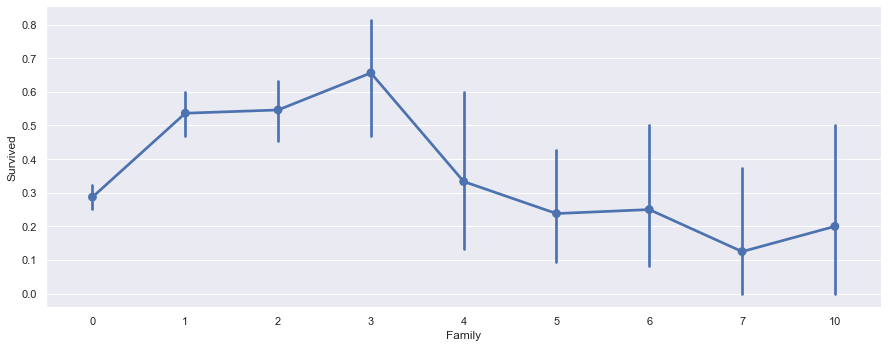

In [473]:
sns.catplot(x='Family', y="Survived",data=data,kind="point",aspect = 2.5)

There is a definitive boost in survivability for passengers with a family size between 1 and 3. After that it returns to baseline

### Fare

In [474]:
first = data[data['Pclass']==1]
second = data[data['Pclass']==2]
third = data[data['Pclass']==3]

Text(0.5, 1.0, '3rd Class')

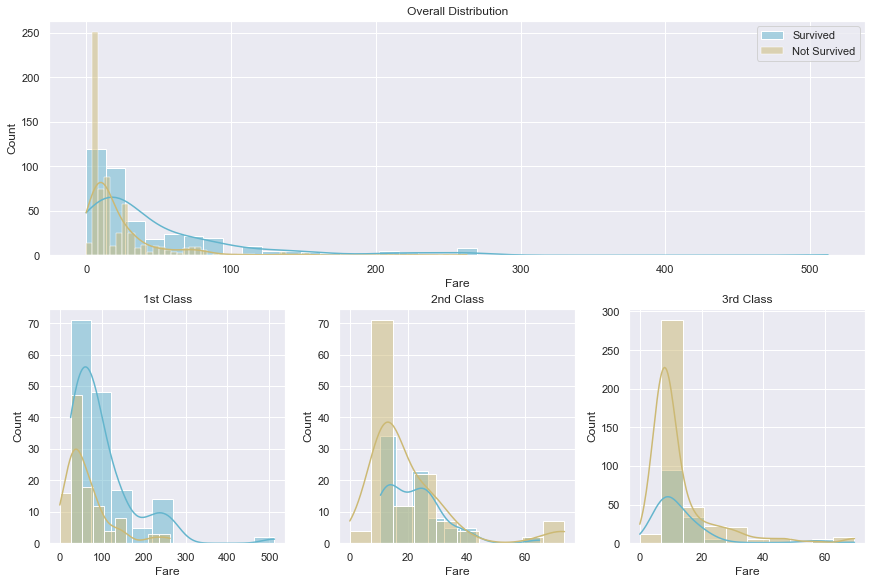

In [475]:
fig = plt.figure(figsize =(12,8), constrained_layout = True)
gs = fig.add_gridspec(nrows = 2, ncols = 3)

ax1 = fig.add_subplot(gs[0,:])
ax1 = sns.histplot(data[data['Survived']==1],x='Fare',kde=True, color = survive[0], label = survive[1])
ax1 = sns.histplot(data[data['Survived']==0],x='Fare',kde=True, color = nsurvive[0], label = nsurvive[1])
ax1.legend()
ax1.set_title("Overall Distribution")

ax2 = fig.add_subplot(gs[1,0])
ax2 = sns.histplot(first[first['Survived']==1].Fare.dropna(), bins=bins, kde =True, 
                  color = survive[0], label = survive[1])
ax2 = sns.histplot(first[first['Survived']==0].Fare.dropna(), bins=bins, kde =True, 
                  color = nsurvive[0], label = nsurvive[1])
ax2.set_title("1st Class")

ax3 = fig.add_subplot(gs[1,1])
ax3 = sns.histplot(second[second['Survived']==1].Fare.dropna(),bins=bins, kde =True, 
                  color = survive[0], label = survive[1])
ax3 = sns.histplot(second[second['Survived']==0].Fare.dropna(),bins=bins, kde =True, 
                  color = nsurvive[0], label = nsurvive[1])
ax3.set_title("2nd Class")

ax4 = fig.add_subplot(gs[1,2])
ax4 = sns.histplot(third[third['Survived']==1].Fare.dropna(),bins=bins, kde =True, 
                  color = survive[0], label = survive[1])
ax4 = sns.histplot(third[third['Survived']==0].Fare.dropna(),bins=bins, kde =True, 
                  color = nsurvive[0], label = nsurvive[1])
ax4.set_title("3rd Class")


The fare category doesn't seem to have much influence on first class but definitely provides a boost for 2nd and 3rd class. The passengers that spent more on their ticket had a better chance at survival. This will require an uneven sample range when we make our ranges or we lose the significance or have a large number of fare ranges

# Process the Data

In [476]:
df_train = x_train.copy()
df_test = x_test.copy()

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

After I have built a model, I'll switch to df being the test data to process it in the same way

In [477]:
df = df_train.copy()

In [478]:
dropped_col = ['Ticket']

## Missing Data

### Name

There is no missing data here, but I want the passenger's title to help impute the age column

In [479]:
# For the Name Column
#Strip all white space 
df['Name'] = df['Name'].str.replace(" ","",regex=True)
#Replace all periods with commas
df['Name'] = df['Name'].str.replace(".",",",regex=True)
#Split the Name column
df[['Last Name','Title',"First Name","Remainder"]] = df['Name'].str.split(',',expand=True)

df['Family'] = df['SibSp']+df['Parch']

# Drop unneeded columns
df = df.drop(columns = ['Cabin','Name','First Name','Last Name','SibSp','Parch','Remainder'])

In [480]:
cols = ['Title','Pclass', 'Sex', 'Age', 'Family','Fare','Embarked']
df = df[cols]
df

,Title,Pclass,Sex,Age,Family,Fare,Embarked
0,Mrs,2,female,57.0,0,10.5000,S
1,Mr,2,male,32.0,1,26.0000,S
2,Miss,3,female,22.0,0,7.7500,Q
3,Miss,3,female,4.0,2,16.7000,S
4,Miss,3,female,9.0,4,34.3750,S
...,...,...,...,...,...,...,...
1042,Mr,2,male,25.0,0,10.5000,S
1043,Mrs,1,female,48.0,1,106.4250,C
1044,Mr,1,male,17.0,0,47.1000,S
1045,Mr,3,male,41.0,2,14.1083,S


#### Titles

In [481]:
def honorific_map(df):
    title_cat = ['Title','Entries','Max','Min','Avg','Sex']
    title_df = pd.DataFrame(columns = title_cat)

    for title in df['Title'].unique():
        ent = len(df.loc[(df['Title'] == title)]['Age'])
        maxim = df.loc[(df['Title'] == title)]['Age'].max()
        minim = df.loc[(df['Title'] == title)]['Age'].min()
        avg = df.loc[(df['Title'] == title)]['Age'].mean()
        sex = df.loc[(df['Title'] == title)]['Sex'].unique()
        df_new = pd.DataFrame({'Title':title,'Entries':ent,'Max':maxim,'Min':minim,'Avg':avg,'Sex':sex})
        
        title_df = pd.concat([title_df,df_new])
    
    return title_df

honorific_map(df)

,Title,Entries,Max,Min,Avg,Sex
0,Mrs,166,76.0,14.0,37.076389,female
0,Mr,610,74.0,14.0,31.902778,male
0,Miss,195,58.0,0.17,22.050854,female
0,Master,47,13.0,0.33,5.18125,male
0,Ms,2,28.0,28.0,28.0,female
0,Dr,8,54.0,23.0,43.571429,male
1,Dr,8,54.0,23.0,43.571429,female
0,Capt,1,70.0,70.0,70.0,male
0,Don,1,40.0,40.0,40.0,male
0,Sir,1,49.0,49.0,49.0,male


In [482]:
#Create a dictionary for all titles/honorifics that contain only one sex
honorifics = {}

mr = ['Mr','Don', 'Rev','Major','Sir','Col','Capt','Jonkheer']
mrs = ['Mrs','Mme','theCountess','Dona','Lady']
miss = ['Miss','Mlle','Ms']
master = ['Master']

In [483]:
#Create a dictionary for all titles/honorifics that contain only one sex
honorifics = {}

mr = ['Mr','Don', 'Rev','Major','Sir','Col','Capt','Jonkheer']
mrs = ['Mrs','Mme','theCountess','Dona','Lady']
miss = ['Miss','Mlle','Ms']
master = ['Master']

for key in mr:
    honorifics[key] = "Mr"
for key in miss:
    honorifics[key] = "Miss"
for key in mrs:
    honorifics[key] = "Mrs"
for key in master:
    honorifics[key] = "Master"

#map the dictionary across the title field
df["Title"] = df["Title"].map(honorifics)
df['Title'].unique()

array(['Mrs', 'Mr', 'Miss', 'Master', nan], dtype=object)

In [484]:
#all titles/honorifics that contained both sexes are now marked as NaN
for i,j in enumerate(df['Title']):
    if df.loc[i,'Title'] not in ['Mr','Mrs','Miss','Master']:
        if df.loc[i,'Sex'] == 'male':
            df.loc[i,'Title'] = 'Mr'
        else:
            df.loc[i,'Title'] = 'Mrs'
            
df['Title'].unique()

array(['Mrs', 'Mr', 'Miss', 'Master'], dtype=object)

### Age

Text(0.5, 1.0, 'Master')

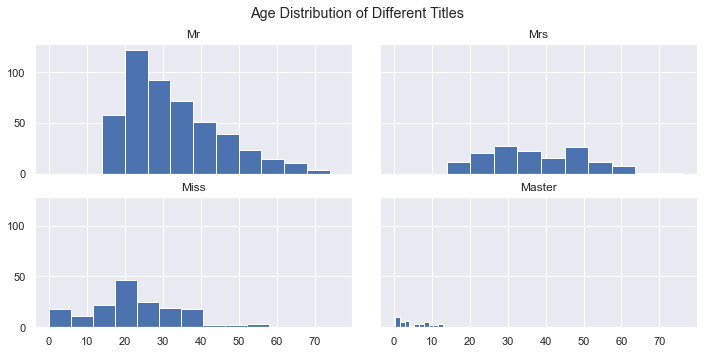

In [485]:
fig, axs = plt.subplots(2, 2,figsize=(10,5),sharex=True, sharey=True)
fig.suptitle('Age Distribution of Different Titles')
fig.tight_layout()

axs[0,0].hist(df[df['Title'] == 'Mr']['Age'].dropna().tolist())
axs[0,0].set_title("Mr")

axs[0,1].hist(df[df['Title'] == 'Mrs']['Age'].dropna().tolist())
axs[0,1].set_title("Mrs")

axs[1,0].hist(df[df['Title'] == 'Miss']['Age'].dropna().tolist())
axs[1,0].set_title("Miss")

axs[1,1].hist(df[df['Title'] == 'Master']['Age'].dropna().tolist())
axs[1,1].set_title("Master")

originally, I had just subsistuted missing ages with the Title mean age, but that really distorted the distribution. So instead I opt to replace each missing data point with a random integer within one standard deviation away from the mean for each title
$$
 \text{age} = \mu_{\text{title}} \pm \sigma_{\text{title}}
$$

In [486]:
def random_age(title,dataframe):
    minim = dataframe[dataframe['Title']==title]['Age'].mean()-dataframe[dataframe['Title']==title]['Age'].std()
    maxim = dataframe[dataframe['Title']==title]['Age'].mean()+dataframe[dataframe['Title']==title]['Age'].std()
    
    return random.randint(int(minim),int(maxim))

In [487]:
nan_index = df['Age'][np.isnan(df['Age'])]
nan_index = nan_index.index.values.tolist()

for index in nan_index:
    df.loc[index,'Age'] = random_age(df.loc[index,"Title"],df)

Text(0.5, 1.0, 'Master')

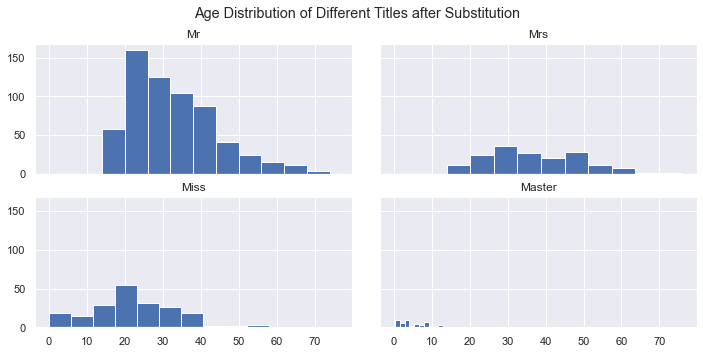

In [488]:
fig, axs = plt.subplots(2, 2,figsize=(10,5),sharex=True, sharey=True)
fig.suptitle('Age Distribution of Different Titles after Substitution')
fig.tight_layout()
axs[0,0].hist(np.array(df[df['Title'] == 'Mr']['Age']))
axs[0,0].set_title("Mr")
axs[0,1].hist(np.array(df[df['Title'] == 'Mrs']['Age']))
axs[0,1].set_title("Mrs")
axs[1,0].hist(np.array(df[df['Title'] == 'Miss']['Age']))
axs[1,0].set_title("Miss")
axs[1,1].hist(np.array(df[df['Title'] == 'Master']['Age']))
axs[1,1].set_title("Master")

We filled in the missing data and maintained the distribution of ages

## CHECKPOINT

In [489]:
df_cp_1 = df.copy()

In [490]:
df_cp_1.isnull().sum()

Title       0
Pclass      0
Sex         0
Age         0
Family      0
Fare        1
Embarked    2
dtype: int64

In [491]:
df_cp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1047 non-null   object 
 1   Pclass    1047 non-null   int64  
 2   Sex       1047 non-null   object 
 3   Age       1047 non-null   float64
 4   Family    1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1045 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 57.4+ KB


### Fare

We could take a similar approach to the missing Fare values. There should be a difference between 1st, 2nd, and 3rd class tickets so it makes sense take the average of the ticket based on Pclass. But with only 1 missing value outof the enitre data, we will just do a simple average

In [492]:
df_cp_1['Fare'].fillna(df_cp_1['Fare'].mean(),inplace=True)

In [493]:
df_cp_1.isnull().sum()

Title       0
Pclass      0
Sex         0
Age         0
Family      0
Fare        0
Embarked    2
dtype: int64

### Embarked

Again, we are not missing much data so we can fill the missing data with the most common port of origin as it is most likely where that passenger boarded.

In [494]:
df_cp_1['Embarked'].value_counts()

S    740
C    215
Q     90
Name: Embarked, dtype: int64

In [495]:
df_cp_1['Embarked'].fillna('S',inplace=True)

In [496]:
df_cp_1.isnull().sum()

Title       0
Pclass      0
Sex         0
Age         0
Family      0
Fare        0
Embarked    0
dtype: int64

In [497]:
df_cp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1047 non-null   object 
 1   Pclass    1047 non-null   int64  
 2   Sex       1047 non-null   object 
 3   Age       1047 non-null   float64
 4   Family    1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 57.4+ KB


## Checkpoint

In [498]:
df_filled = df_cp_1.copy()
df_filled.head()

,Title,Pclass,Sex,Age,Family,Fare,Embarked
0,Mrs,2,female,57.0,0,10.500,S
1,Mr,2,male,32.0,1,26.000,S
2,Miss,3,female,22.0,0,7.750,Q
3,Miss,3,female,4.0,2,16.700,S
4,Miss,3,female,9.0,4,34.375,S


## Handling Categorical Data

Sex, Title, and Embarked have a simple integer mapping

### Sex

In [499]:
df_filled['Sex'] = df_filled['Sex'].map({'male':1,'female':0})

### Title

In [500]:
df_filled['Title'] = df_filled['Title'].map({'Master':3,'Miss':1,'Mr':2,'Mrs':0})

### Embarked

In [501]:
df_filled['Embarked'] = df_filled['Embarked'].map({'C':0,'Q':1,'S':2})

In [502]:
df_filled.head()

,Title,Pclass,Sex,Age,Family,Fare,Embarked
0,0,2,0,57.0,0,10.500,2
1,2,2,1,32.0,1,26.000,2
2,1,3,0,22.0,0,7.750,1
3,1,3,0,4.0,2,16.700,2
4,1,3,0,9.0,4,34.375,2


In [503]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1047 non-null   int64  
 1   Pclass    1047 non-null   int64  
 2   Sex       1047 non-null   int64  
 3   Age       1047 non-null   float64
 4   Family    1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


### Age and Fare

Im going to need to reduce the number of unique values for the two ranges

Text(0.5, 1.0, 'Fare')

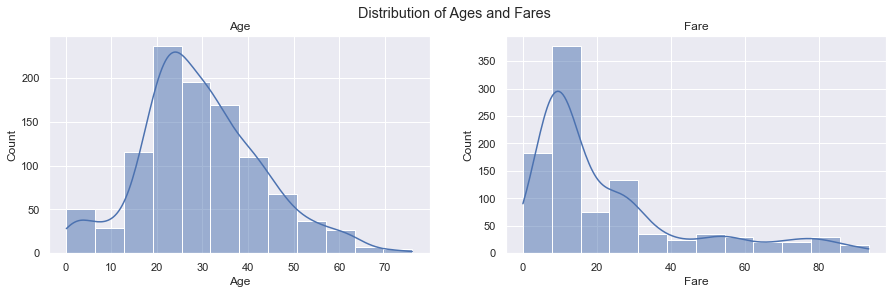

In [504]:
fig, axes = plt.subplots(1, 2,figsize = (15,4))
fig.suptitle('Distribution of Ages and Fares')


lower_fares = df_filled[df_filled['Fare']<100]

ax = sns.histplot(df_filled['Age'],  ax = axes[0], bins = 12, kde=True)
ax.set_title("Age")
ax = sns.histplot(lower_fares['Fare'], ax = axes[1], bins = 12, kde=True)
ax.set_title("Fare")

In [505]:
bin_size = 12

In [506]:
int(lower_fares['Fare'].max()/bin_size)

7

In [507]:
int(lower_fares['Age'].max()/bin_size)

6

In [508]:
df_filled['Age']=df_filled['Age'].map(lambda x: x//int(lower_fares['Age'].max()/bin_size)).astype(int)

In [509]:
df_filled['Fare']=df_filled['Fare'].map(lambda x: x//int(lower_fares['Fare'].max()/bin_size)).astype(int)

In [510]:
df_filled

,Title,Pclass,Sex,Age,Family,Fare,Embarked
0,0,2,0,9,0,1,2
1,2,2,1,5,1,3,2
2,1,3,0,3,0,1,1
3,1,3,0,0,2,2,2
4,1,3,0,1,4,4,2
...,...,...,...,...,...,...,...
1042,2,2,1,4,0,1,2
1043,0,1,0,8,1,15,0
1044,2,1,1,2,0,6,2
1045,2,3,1,6,2,2,2


In [511]:
data_train_cleaned = df_filled.copy()

## Simplified Cleaning Code for Test Data

In [512]:
dft = df_test.copy()

In [513]:
dropped_col = ['Ticket']

# For the Name Column
  #Strip all white space 
dft['Name'] = dft['Name'].str.replace(" ","",regex=True)
  #Replace all periods with commas
dft['Name'] = dft['Name'].str.replace(".",",",regex=True)
  #Split the Name feature
dft[['Last Name','Title',"First Name"]] = dft['Name'].str.split(',',expand=True)

#Create Family Feature
dft['Family'] = dft['SibSp']+dft['Parch']

# Drop unneeded features
dft = dft.drop(columns = ['Cabin','Name','First Name','Last Name','SibSp','Parch'])

# reorder features 
cols = ['Title','Pclass', 'Sex', 'Age', 'Family','Fare','Embarked']
dft = dft[cols]

# remap the titles to limited titles
dft["Title"] = dft["Title"].map(honorifics)

#handle cases where a title falls in multiple categories
for i,j in enumerate(dft['Title']):
    if dft.loc[i,'Title'] not in ['Mr','Mrs','Miss','Master']:
        if dft.loc[i,'Sex'] == 'male':
            dft.loc[i,'Title'] = 'Mr'
        else:
            dft.loc[i,'Title'] = 'Mrs'

# fill in missing age data with distributed age data
nan_index = dft['Age'][np.isnan(dft['Age'])]
nan_index = nan_index.index.values.tolist()

for index in nan_index:
    dft.loc[index,'Age'] = random_age(dft.loc[index,"Title"],df)

# fill in missing fare data with an average
dft['Fare'].fillna(dft['Fare'].mean(),inplace=True)

# replace missing embarked data with 'S'
dft['Embarked'].fillna('S',inplace=True)

# Map Sex, Title, and Embarked features
dft['Sex'] = dft['Sex'].map({'male':1,'female':0})
dft['Title'] = dft['Title'].map({'Master':3,'Miss':1,'Mr':2,'Mrs':0})
dft['Embarked'] = dft['Embarked'].map({'C':0,'Q':1,'S':2})


dft['Age']=dft['Age'].map(lambda x: x//int(lower_fares['Age'].max()/bin_size)).astype(int)
dft['Fare']=dft['Fare'].map(lambda x: x//int(lower_fares['Fare'].max()/bin_size)).astype(int)

dft

,Title,Pclass,Sex,Age,Family,Fare,Embarked
0,2,3,1,4,0,1,2
1,2,1,1,7,0,3,2
2,2,3,1,3,0,1,2
3,2,2,1,6,0,1,2
4,1,3,0,4,0,1,1
...,...,...,...,...,...,...,...
257,2,1,1,6,0,3,2
258,0,3,0,6,2,2,0
259,1,3,0,5,0,0,1
260,0,2,0,4,2,3,2


In [514]:
data_test_cleaned = dft.copy()

# Build the Decision Tree

## Preliminary Tree

In [515]:
pre_tree = DecisionTreeClassifier()
pre_tree.fit(data_train_cleaned,y_train)

DecisionTreeClassifier()

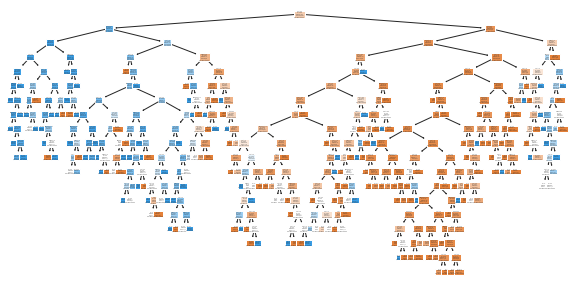

In [522]:
plt.figure(figsize=(10,5))
tree.plot_tree(pre_tree, filled=True, class_names = ['Did Not Survive', 'Survived'], feature_names = data_train_cleaned.columns)
plt.show()

In [517]:
predictions = pre_tree.predict(data_test_cleaned)

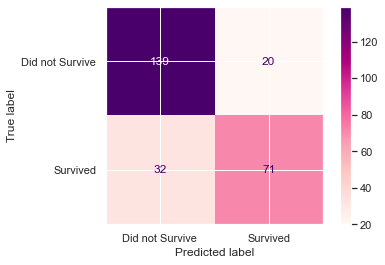

In [518]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions,display_labels=["Did not Survive","Survived"],cmap='RdPu')

In [524]:
result = predictions + y_test
acc = (result.value_counts()[0]+result.value_counts()[2])/len(result)

print(f'Preliminary Tree is ~{acc:.0%} accurate')

Preliminary Tree is ~80% accurate


### Determine Alpha